In [1]:
import numpy as np
import pandas as pd
import neutron_stars as ns
import matplotlib.pyplot as plt

from tqdm import tqdm 
from glob import iglob

In [2]:
from IPython.core.pylabtools import figsize
figsize(30, 10)

In [3]:
all_files = [
    f for f in iglob(ns.DATA_DIR + '*.npz')
    if "2Param" in f
]

In [4]:
details = np.zeros((0, 5))
spectra = np.zeros((0, 250))
coefficients = np.zeros((0, 2))

for file in tqdm(all_files[:50]):
    np_file = np.load(file)
    
    spectra = np.concatenate([
        spectra,
        np_file['spectra'][:, :250], 
    ])
    details = np.concatenate([
        details,
        np_file['details'], 
    ])
    coefficients = np.concatenate([
        coefficients,
        np_file['coefficients'], 
    ])

100%|██████████| 50/50 [00:04<00:00, 10.29it/s]


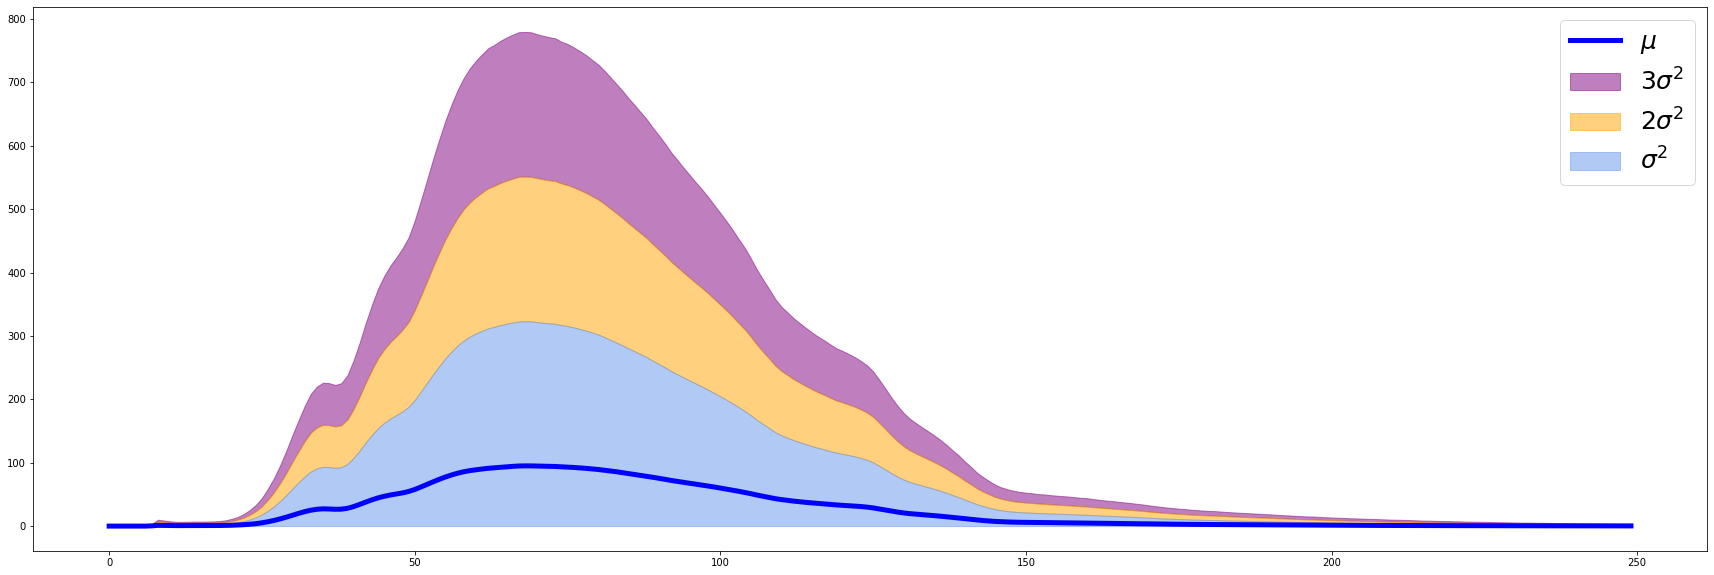

In [5]:
x = np.arange(250)
sigma = np.mean(spectra, 0) + np.std(spectra, 0)
sigma2 = np.mean(spectra, 0) + 2*np.std(spectra, 0)
sigma3 = np.mean(spectra, 0) + 3*np.std(spectra, 0)
lower = np.zeros(250)

plt.fill_between(x, sigma3, sigma2, alpha=.5, color='purple', label='$3\sigma^2$')
plt.fill_between(x, sigma2, sigma, alpha=.5, color='orange', label='$2\sigma^2$')
plt.fill_between(x, sigma, lower, alpha=.5, color='cornflowerblue', label=r'$\sigma^2$')
plt.plot(x, np.mean(spectra, 0), color='b', lw=5, label=r'$\mu$')

plt.legend(fontsize=25);

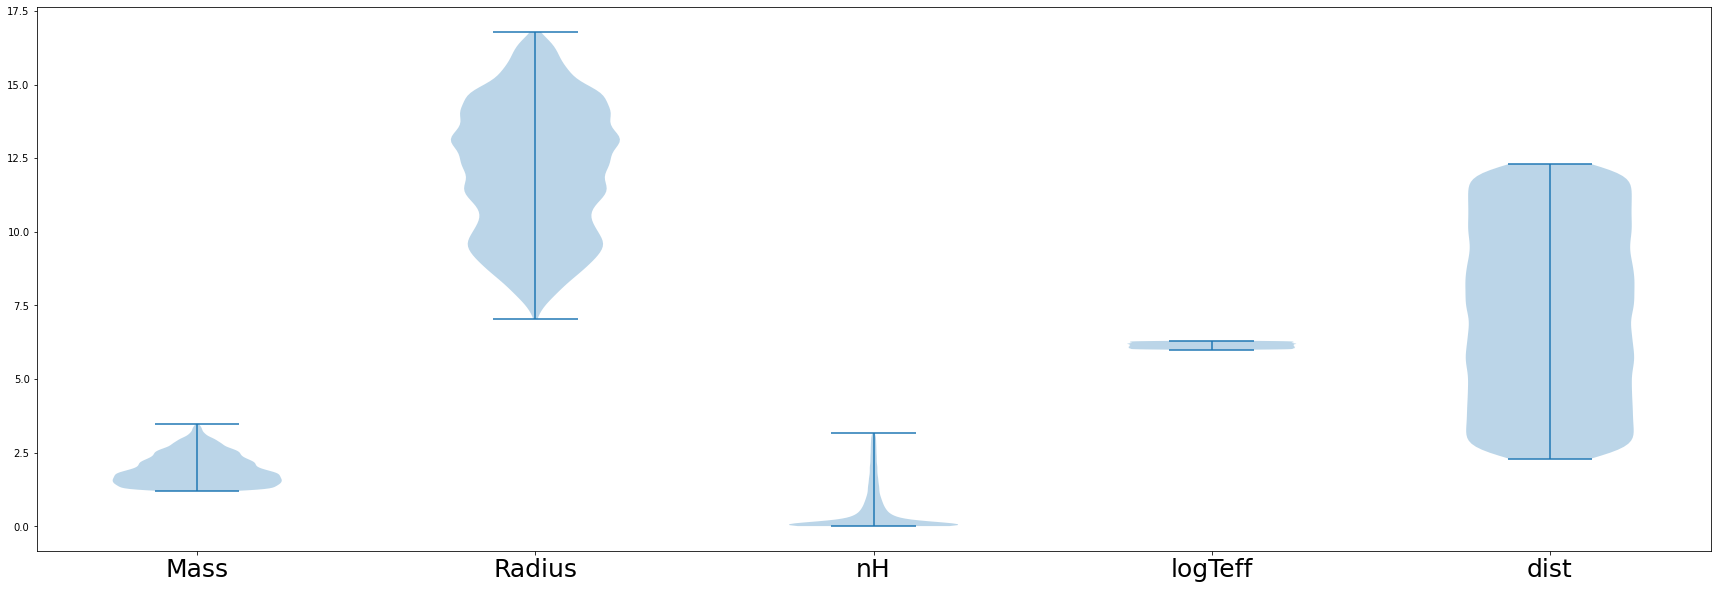

In [6]:
plt.violinplot(details);
plt.xticks(range(1,6), ['Mass', 'Radius', 'nH', 'logTeff', 'dist'], fontsize=25);

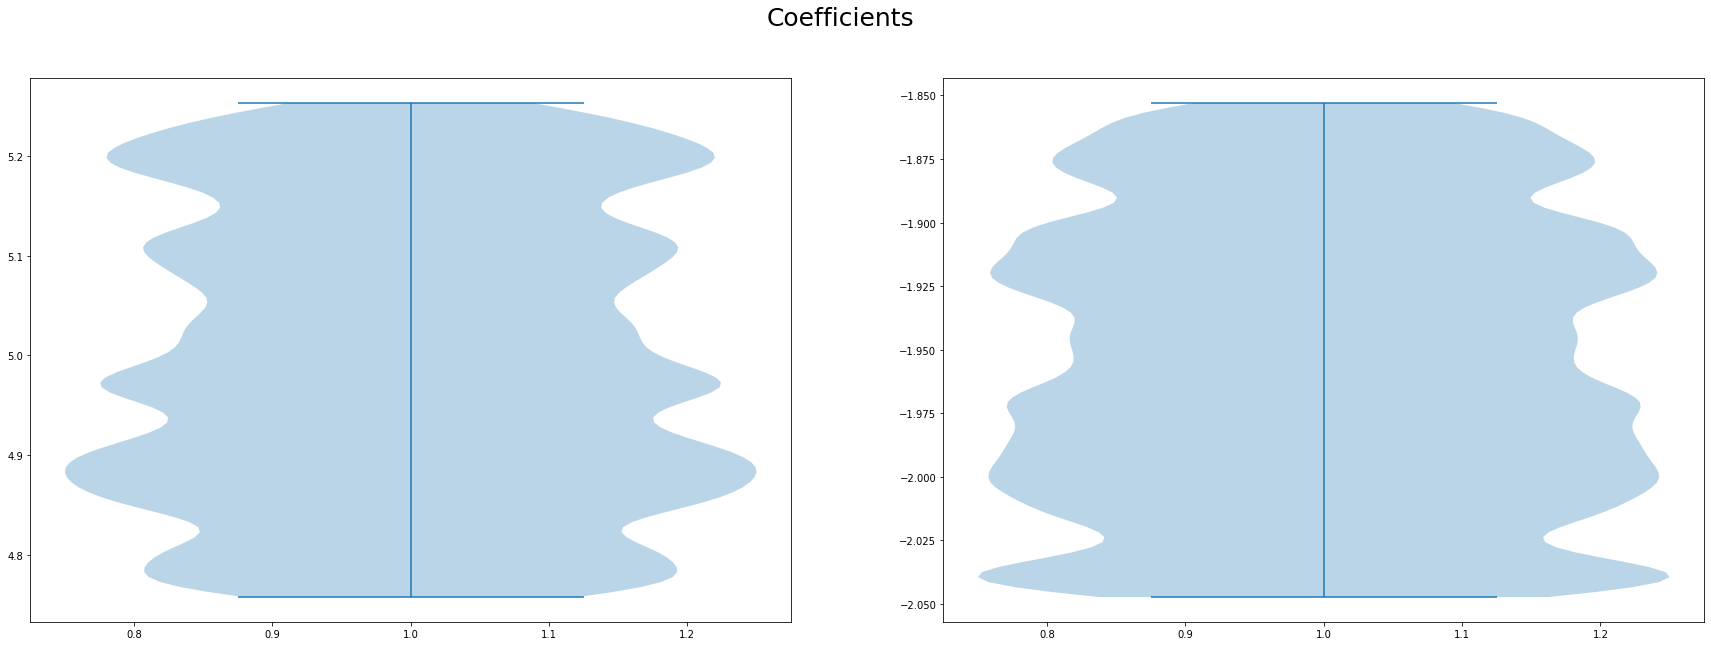

In [7]:
plt.subplot(1,2,1)
plt.violinplot(coefficients[:, 0]);
plt.subplot(1,2,2)
plt.violinplot(coefficients[:, 1]);
plt.suptitle('Coefficients', fontsize=25);

In [28]:
from sklearn.preprocessing import StandardScaler, MinMaxScaler, RobustScaler

In [31]:
scaler = StandardScaler()
scaled_spectra = scaler.fit_transform(spectra)

In [69]:
cleaned_spectra = np.nan_to_num(np.log(spectra + 1), nan=0, posinf=0, neginf=0)

In [70]:
np.sum(cleaned_spectra == np.log(1e-1))

0

In [71]:
np.sum(spectra == 0)

4850321

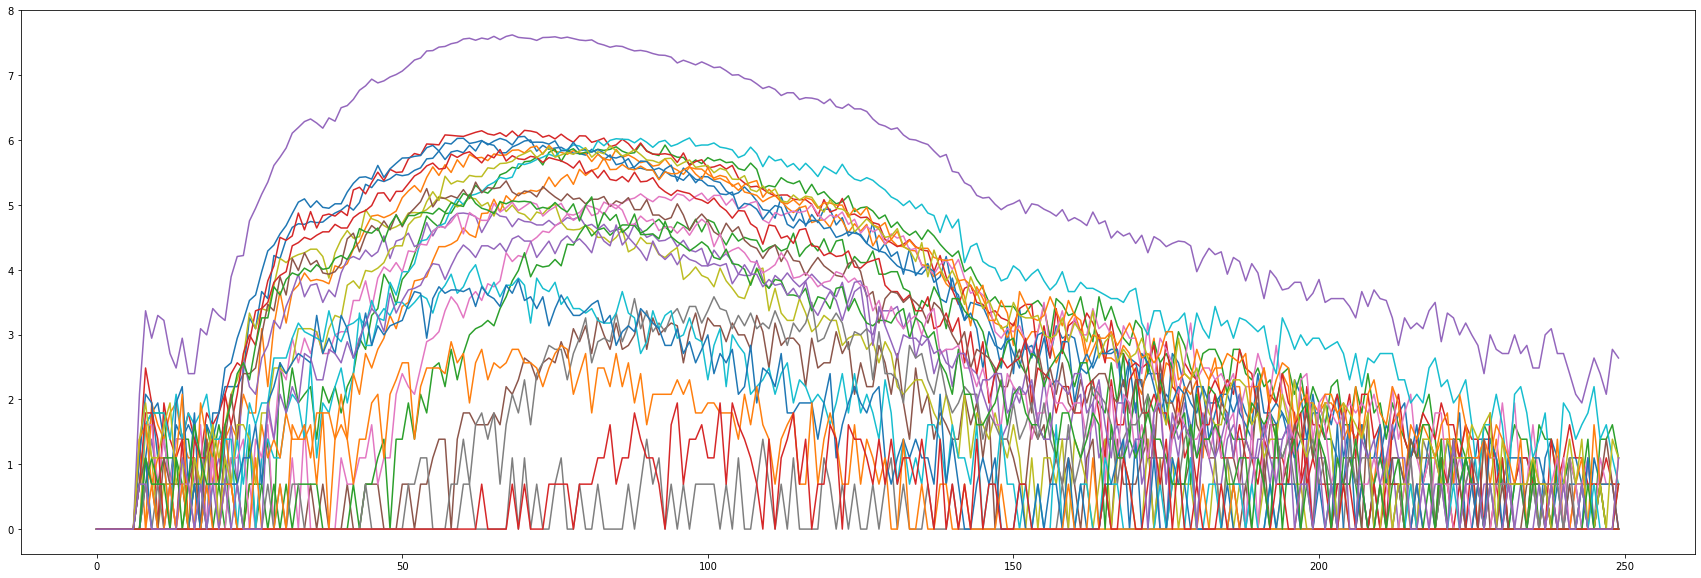

In [74]:
plt.plot(cleaned_spectra[:25].T);